# Honey Bee Pollen Classification

## Dataset

Honey Bee Pollen dataset has been created from videos captured at the entrance of a bee colony in June 2017 at the Bee facility of the Gurabo Agricultural Experimental Station of the University of Puerto Rico.
Dataset  contains images for pollen bearing and no pollen bearing honey bees. Images will be read by code and convert into numpy array of size 300*180 .

In [72]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [73]:
path="C:\\Users\\Akshay\\Downloads\\PollenDataset\\images"

# prepare list of all images available in the path mention above
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [74]:
"""
First, Function will read all image of honey bee.
Second, All images will be resize to 300*180 size.
Third, All image will be flatten and store into list variable.
Labels will be assign as 0 for Non Pollen Bee and 1 for Pollen Bee.
Funtion will return array of flatten image and array of labels

"""
def dataset(file_list,size=(180,300),flattened=False):
	data = []
	for i, file in enumerate(file_list):
		image = io.imread(file)
		image = transform.resize(image, size, mode='constant')
		if flattened:
			image = image.flatten()

		data.append(image)

	labels = [1 if f.split("\\")[-1][0] == 'P' else 0 for f in file_list]

	return np.array(data), np.array(labels)

In [75]:
# Load the dataset (may take a few seconds)

X,y=dataset(imlist)

C:\Users\Akshay\PycharmProjects\Big_Data_Class\venv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [76]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

X:  (714, 180, 300, 3)
y:  (714,)


In [77]:
print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))
print(y)

Class 0:  345
Class 1:  369
Total  :  714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [78]:
%matplotlib inline 

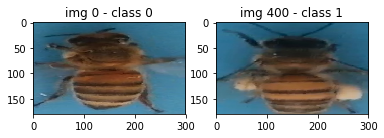

In [79]:
# Bellow images is of Pollen and NonPollen Honey Bee
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=400
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

In [80]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [87]:
print(X_train.shape,y_train.shape)

(535, 180, 300, 3) (535,)


In [89]:
def create_model(features, labels, mode):
    # batch_size, largura, altura, canais
    #canais para coloridas = 3
    #-1 quando não sabemos a quantidade
    entry_data = tf.reshape(features['X'], [-1, 300, 180, 3])
    
    # recebe [batch_size, 300, 180, 3]
    # retorna [batch_size, 300, 180, 32]
    #o 32 vem dos 32 filtros adicionados 
    convolu1 = tf.layers.conv2d(inputs = entry_data, filters = 32, kernel_size=[10,10], activation = tf.nn.relu,
                                  padding = 'same')
    # retorna [batch_size, 300, 180, 32]
    # retorna [batch_size, 150, 90, 32]
    pooling1 = tf.layers.max_pooling2d(inputs = convolu1, pool_size = [5,5], strides = 5)
    
    # retorna [batch_size, 150, 90, 32]
    # retorna [batch_size, 150, 90, 64]
    convolu2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = [10,10], activation = tf.nn.relu,
                                  padding = 'same')
    # retorna [batch_size, 150, 90, 64]
    # retorna [batch_size, 75, 45, 64]
    pooling2 = tf.layers.max_pooling2d(inputs = convolu2, pool_size = [3,3], strides = 3)
    
    # retorna [batch_size, 75, 45, 64]
    # retornar [batch_size, 216000]

    flattening = tf.reshape(pooling2, [-1, 20 * 12 * 64])
    #flattening = tf.reshape(pooling2, [-1,15360])

    
    # 216000 (entradas) -> 3000 (oculta) -> 2 (saída)
    # recebe [batch_size, 15360]
    # retornar [batch_size, 3000]
    dense = tf.layers.dense(inputs = flattening, units = 3000, activation = tf.nn.relu)
    # dropout
    #zera algumas entradas. rate e a porcentagem. 
    dropout = tf.layers.dropout(inputs = dense, rate = 0.3, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # recebe [batch_size, 3000]
    # retornar [batch_size, 2]
    exit_l = tf.layers.dense(inputs = dropout, units = 2)
    
    predicted = tf.argmax(exit_l, axis = 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predicted)
    
    
    error = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = exit_l)
    
    
    #erro = tf.losses.softmax_cross_entropy(onehot_labels = labels, logits = saida)
    #erro = tf.losses.sigmoid_cross_entropy(multi_class_labels = labels, logits = saida)

    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
        training = optimizer.minimize(error, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = error, train_op = training)
    
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = predicted)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = error, eval_metric_ops = eval_metrics_ops)

In [90]:
classifier = tf.estimator.Estimator(model_fn = create_model)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Akshay\\AppData\\Local\\Temp\\tmp4a3ndx31', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002EDB0896780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
train_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_train}, y = y_train,
                                                       batch_size = 128, num_epochs = None, shuffle = True)
classifier.train(input_fn=train_function, steps = 200)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Akshay\AppData\Local\Temp\tmp4a3ndx31\model.ckpt.


In [ ]:
test_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_test}, y = y_test, num_epochs = 1,
                                                      shuffle = False)
pred_value = classifier.evaluate(input_fn=test_function)
pred_value

In [ ]:
X_image_test = X_test[97]
X_image_test.shape

In [ ]:
X_image_test = X_image_test.reshape(1,-1)
X_image_test.shape

In [ ]:
pred_function = tf.estimator.inputs.numpy_input_fn(x = {'X': X_image_test}, shuffle = False)
pred = list(classificador.predict(input_fn = pred_function))

In [ ]:
X_image_test = X_image_test.reshape(300,180,3)
X_image_test.shape
X_image_test = np.asarray(X_image_test,dtype = np.uint8)
plt.imshow(X_image_test)
plt.title(str(pred))